In [1]:
# required imports

import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from imblearn.under_sampling import ClusterCentroids
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [2]:
# Read and preview the data

df = pd.read_csv('turkiye-student-evaluation_generic.csv')
df.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [3]:
# count the target variable
# we can see that it is highly imbalanced

df['nb.repeat'].value_counts()

1    4909
2     576
3     335
Name: nb.repeat, dtype: int64

In [4]:
# Drop the question columns except 1 and 11 (viewed as important features from methods below)
# rest all are correlated

Q_columns = ['Q' + str(x) for x in range(1, 29) if x not in [1,2,12]]
df_dropped = df.drop(Q_columns, axis=1)

In [5]:
# Separate features and target column

X = df_dropped.drop(['nb.repeat'], axis=1)
y = df_dropped['nb.repeat']

In [6]:
# Train and test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [7]:
# Use Decision trees and view important features

dt_clf = DecisionTreeClassifier(class_weight='balanced')
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

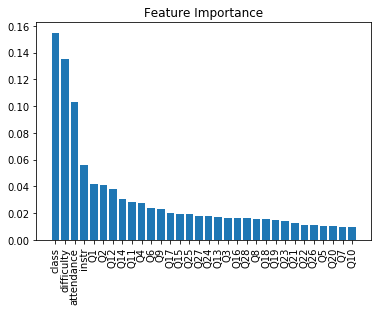

In [8]:
X = df.drop(['nb.repeat'], axis=1)
y = df['nb.repeat']
clf = DecisionTreeClassifier(class_weight='balanced', random_state=40)
clf.fit(X, y)

# Visualize feature importance

importances = clf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
plt.show()

In [9]:
# Training Reports

y_pred_train = dt_clf.predict(X_train)
print(classification_report(y_train, y_pred_train))
print(accuracy_score(y_train, y_pred_train))

              precision    recall  f1-score   support

           1       0.99      0.81      0.89      3436
           2       0.51      0.88      0.65       403
           3       0.38      0.93      0.54       235

    accuracy                           0.82      4074
   macro avg       0.63      0.88      0.69      4074
weighted avg       0.91      0.82      0.85      4074

0.8244968090328915


In [10]:
# Testing Reports

y_pred = dt_clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.89      0.72      0.80      1473
           2       0.19      0.32      0.24       173
           3       0.10      0.26      0.15       100

    accuracy                           0.66      1746
   macro avg       0.39      0.43      0.39      1746
weighted avg       0.77      0.66      0.70      1746

0.6563573883161512


In [11]:
# Use Random Forest

rf_clf = RandomForestClassifier(class_weight='balanced')
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

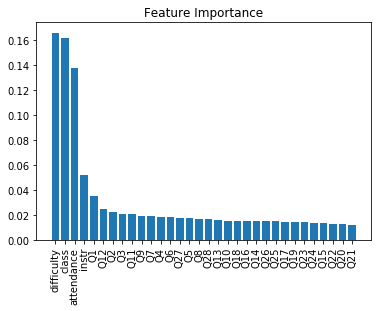

In [12]:
# Visualize important features

X = df.drop(['nb.repeat'], axis=1)
y = df['nb.repeat']
clf = RandomForestClassifier(class_weight='balanced', random_state=40)
clf.fit(X, y)


importances = clf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
plt.show()

In [13]:
# View its training performance

y_pred_train = rf_clf.predict(X_train)
print(classification_report(y_train, y_pred_train))
print(accuracy_score(y_train, y_pred_train))

              precision    recall  f1-score   support

           1       0.98      0.87      0.92      3436
           2       0.60      0.83      0.69       403
           3       0.44      0.87      0.58       235

    accuracy                           0.87      4074
   macro avg       0.67      0.86      0.73      4074
weighted avg       0.91      0.87      0.88      4074

0.8669612174766814


In [14]:
# View testing accuracy

y_pred = rf_clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.88      0.83      0.86      1473
           2       0.25      0.27      0.26       173
           3       0.13      0.23      0.17       100

    accuracy                           0.74      1746
   macro avg       0.42      0.44      0.43      1746
weighted avg       0.78      0.74      0.76      1746

0.7394043528064147


In [15]:
# Implement SVM

svm_clf = svm.LinearSVC(class_weight='balanced', multi_class='ovr')
svm_clf.fit(X_train, y_train)

/home/yaser/anaconda3/envs/MLPracs/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [16]:
# View its training performance

y_pred_train = svm_clf.predict(X_train)
print(classification_report(y_train, y_pred_train))
print(accuracy_score(y_train, y_pred_train))

              precision    recall  f1-score   support

           1       0.85      0.98      0.91      3436
           2       0.08      0.01      0.01       403
           3       0.22      0.05      0.08       235

    accuracy                           0.83      4074
   macro avg       0.38      0.35      0.34      4074
weighted avg       0.74      0.83      0.77      4074

0.8325969563082966


In [17]:
# View its testing performance

y_pred = svm_clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.85      0.99      0.91      1473
           2       0.29      0.03      0.05       173
           3       0.26      0.07      0.11       100

    accuracy                           0.84      1746
   macro avg       0.47      0.36      0.36      1746
weighted avg       0.76      0.84      0.78      1746

0.8379152348224513


In [18]:
# Implement XGBoost

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [19]:
# View its training performance

y_pred_train = xgb_clf.predict(X_train)
print(classification_report(y_train, y_pred_train))
print(accuracy_score(y_train, y_pred_train))

              precision    recall  f1-score   support

           1       0.85      1.00      0.92      3436
           2       0.75      0.01      0.03       403
           3       0.56      0.02      0.04       235

    accuracy                           0.85      4074
   macro avg       0.72      0.35      0.33      4074
weighted avg       0.82      0.85      0.78      4074

0.845360824742268


In [20]:
# View its testing performance

y_pred = svm_clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.85      0.99      0.91      1473
           2       0.29      0.03      0.05       173
           3       0.26      0.07      0.11       100

    accuracy                           0.84      1746
   macro avg       0.47      0.36      0.36      1746
weighted avg       0.76      0.84      0.78      1746

0.8379152348224513


In [21]:
# Implement Naive Bayes Algorithn

nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [22]:
# View its training performance

y_pred_train = nb_clf.predict(X_train)
print(classification_report(y_train, y_pred_train))
print(accuracy_score(y_train, y_pred_train))

              precision    recall  f1-score   support

           1       0.84      1.00      0.92      3436
           2       0.00      0.00      0.00       403
           3       0.00      0.00      0.00       235

    accuracy                           0.84      4074
   macro avg       0.28      0.33      0.31      4074
weighted avg       0.71      0.84      0.77      4074

0.8433971526755032


/home/yaser/anaconda3/envs/MLPracs/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
# View its training performance
y_pred = nb_clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.84      1.00      0.92      1473
           2       0.00      0.00      0.00       173
           3       0.00      0.00      0.00       100

    accuracy                           0.84      1746
   macro avg       0.28      0.33      0.31      1746
weighted avg       0.71      0.84      0.77      1746

0.8436426116838488


/home/yaser/anaconda3/envs/MLPracs/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Using Cluster Centroids for Under Sampling

In [24]:
sm = ClusterCentroids(sampling_strategy={1:500,2:403,3:235}, random_state = 2)

X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

unique_elements, counts_elements = np.unique(y_train_res, return_counts=True)
list(zip(unique_elements, counts_elements))

/home/yaser/anaconda3/envs/MLPracs/lib/python3.7/site-packages/imblearn/under_sampling/_prototype_generation/_cluster_centroids.py:161: ConvergenceWarning: Number of distinct clusters (343) found smaller than n_clusters (403). Possibly due to duplicate points in X.
  self.estimator_.fit(X[y == target_class])
/home/yaser/anaconda3/envs/MLPracs/lib/python3.7/site-packages/imblearn/under_sampling/_prototype_generation/_cluster_centroids.py:161: ConvergenceWarning: Number of distinct clusters (199) found smaller than n_clusters (235). Possibly due to duplicate points in X.
  self.estimator_.fit(X[y == target_class])


[(1, 500), (2, 403), (3, 235)]

## Re-implementation of Algorithms on Under-Sampled Data

In [25]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train_res, y_train_res)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [26]:
y_pred_train = dt_clf.predict(X_train_res)
print(classification_report(y_train_res, y_pred_train))
print('Accuracy: ', accuracy_score(y_train_res, y_pred_train))

              precision    recall  f1-score   support

           1       0.94      0.99      0.96       500
           2       0.91      0.92      0.91       403
           3       0.93      0.83      0.87       235

    accuracy                           0.93      1138
   macro avg       0.93      0.91      0.92      1138
weighted avg       0.93      0.93      0.93      1138

Accuracy:  0.9279437609841827


In [27]:
y_pred = dt_clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.92      0.45      0.61      1473
           2       0.13      0.51      0.21       173
           3       0.09      0.29      0.13       100

    accuracy                           0.45      1746
   macro avg       0.38      0.42      0.32      1746
weighted avg       0.79      0.45      0.54      1746

0.4513172966781214


In [28]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [29]:
y_pred_train = rf_clf.predict(X_train_res)
print(classification_report(y_train_res, y_pred_train))
print('Accuracy: ', accuracy_score(y_train_res, y_pred_train))

              precision    recall  f1-score   support

           1       0.97      0.96      0.96       500
           2       0.92      0.90      0.91       403
           3       0.86      0.90      0.88       235

    accuracy                           0.93      1138
   macro avg       0.92      0.92      0.92      1138
weighted avg       0.93      0.93      0.93      1138

Accuracy:  0.9279437609841827


In [30]:
y_pred = rf_clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.92      0.50      0.64      1473
           2       0.14      0.48      0.22       173
           3       0.10      0.34      0.15       100

    accuracy                           0.49      1746
   macro avg       0.38      0.44      0.34      1746
weighted avg       0.79      0.49      0.57      1746

0.4868270332187858


In [31]:
nb_clf = RandomForestClassifier()
nb_clf.fit(X_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
y_pred_train = nb_clf.predict(X_train_res)
print(classification_report(y_train_res, y_pred_train))
print('Accuracy: ', accuracy_score(y_train_res, y_pred_train))

              precision    recall  f1-score   support

           1       0.97      0.96      0.96       500
           2       0.90      0.93      0.91       403
           3       0.89      0.87      0.88       235

    accuracy                           0.93      1138
   macro avg       0.92      0.92      0.92      1138
weighted avg       0.93      0.93      0.93      1138

Accuracy:  0.9279437609841827


In [33]:
y_pred = nb_clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.92      0.50      0.64      1473
           2       0.14      0.51      0.22       173
           3       0.10      0.34      0.16       100

    accuracy                           0.49      1746
   macro avg       0.39      0.45      0.34      1746
weighted avg       0.79      0.49      0.58      1746

0.48911798396334477


##### Seems like we have to find some other technique to incresing the performance